# Problem 3
In this problem, I modified the chi_square_fit for the Expodential function $y=Ae^x$, for use for CH4 Data.

This was done by transforming $y=Ae^x$ into $ln(y)=ln(A)+x$ in the begining of the chi_square_fit function, and then runing the rest of the function as usual.

Also includes an edited function for loading in the CH4 data from a txt file.

In [1]:
import numpy as np
import math
from P3 import chi_square_fit
from matplotlib import pyplot as plt 
from read_ch4 import read_ch4

Below is a function to assist with creating a line out of just a slope and intercept.

In [2]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals,y_vals, label = 'Best Fit Line')
    return(x_vals, y_vals)

Below I read in the data from the CH4.txt file,  and run the modified chi_square_fit function from P3.py.

In [3]:
dates,data,err = read_ch4("CH4.txt")

In [4]:
z = chi_square_fit(dates,data,err)

Below, I convert the original data into an equivilant form using the equation $ln(y)=ln(A)+x$ to linearize it.  Next, the output from chi_square_fit is plotted with this linearized direct data.

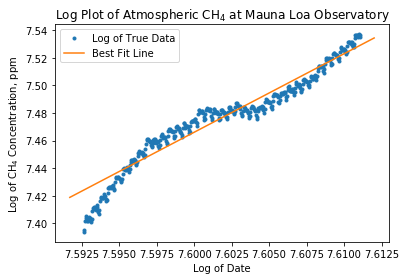

In [5]:
def f(g):
    return math.log(g)
def h(yi,j):
    return math.sqrt(1/(yi*math.log(10)))*j
    
f1 = np.vectorize(f)
f2 = np.vectorize(f)
h1 = np.vectorize(h)
    
lineDates = f1(dates)
lineData = f2(data)

plt.plot(lineDates,lineData, '.',  label='Log of True Data')
abline(z[1],z[0])

plt.title(r"Log Plot of Atmospheric CH$_{4}$ at Mauna Loa Observatory")
plt.xlabel("Log of Date")
plt.ylabel(r"Log of CH$_{4}$ Concentration, ppm")
plt.legend()


plt.show()

The fit is better for the center years to top years, and is ruined a bit by the earlier years far-different slope.